Source: https://www.kaggle.com/kuldeepchoudhary/reddit-meme-analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from pandas.io.json import json_normalize

In [2]:
#import the necessary packages
#Source: https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/
import sys
!{sys.executable} -m pip install opencv-python
import cv2

In [3]:
# METHOD #2: scikit-image
from skimage import io
def url_to_cvimage(url):
    try:
        image = io.imread(url)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.waitKey(0)
        return image
    except:
        return "N/A"

In [4]:
def cvimage_to_pic(cvimage):
    temp = cv2.cvtColor(cvimage, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(temp)
    plt.show()

In [5]:
with open("./memesDatabase.json",'r') as f:
    d = json.load(f)
d = d['_default']

In [8]:
k=DataFrame([])
df=DataFrame([])
for i in d:
    k = json_normalize(d[i])
    df = df.append(k,sort=True)

In [9]:
df.index=range(len(d))

In [10]:
df['date_created'] = df['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [11]:
df.sort_values(by=['ups'], inplace=True, ascending = False)

In [12]:
df['image'] = df['media'].apply(lambda x: url_to_cvimage(x))

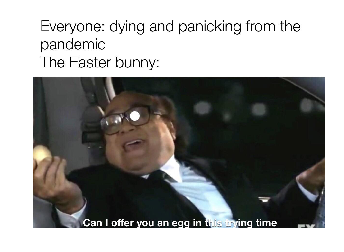

In [13]:
cvimage_to_pic(df['image'][0])

In [14]:
df.head(5)

author   created_utc  downs      id  \
81          dat1ssjguy  1.586552e+09      0  fyoml4   
12           iamit1102  1.586665e+09      0  fzpuan   
1       pickleslayer27  1.586716e+09      0  g01w45   
33  dankbob_memepants_  1.586616e+09      0  fz6p05   
0           ToxicKing5  1.586764e+09      0  g0eh3f   

                                  media  thumbnail.height  \
81  https://i.redd.it/yn8htm3x02s41.jpg               140   
12  https://i.redd.it/4zga7dbnbbs41.jpg                91   
1   https://i.redd.it/qczsn63gjfs41.jpg               116   
33  https://i.redd.it/repxzfelb7s41.jpg               140   
0   https://i.redd.it/52xvu0i4jjs41.jpg               104   

                                  thumbnail.thumbnail  thumbnail.width  \
81  https://b.thumbs.redditmedia.com/Xe4d0LtDHY-cC...              140   
12  https://b.thumbs.redditmedia.com/PBgC6USK2r4uD...              140   
1   https://b.thumbs.redditmedia.com/DTiHvPXL-y76E...              140   
33  https://b.thumbs.redditmedia.com/pOVMmHaB4d0Uv...              140   
0   https://b.thumbs.redditmedia.com/81sle5Pyug9uI...              140   

                                   title    ups        date_created  \
81                 Where is covid 1 - 18  12171 2020-04-10 15:57:41   
12                            ( ͝° ͜ʖ͡°)  10255 2020-04-11 23:13:52   
1   I Hope this hasn't been done before.  10165 2020-04-12 13:24:41   
33      This is an avengers level relief   9903 2020-04-11 09:46:26   
0    I hope this hasn’t been done before   5951 2020-04-13 02:50:02   

                                                image  
81  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
12  [[[253, 253, 253], [253, 253, 253], [252, 252,...  
1   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
33  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
0   [[[255, 255, 255], [255, 255, 255], [255, 255,...

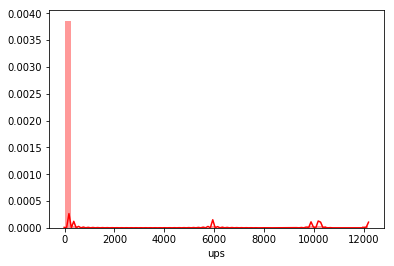

In [15]:
sns.distplot(df['ups'], color="r")

In [16]:
df.describe()

created_utc  downs  thumbnail.height  thumbnail.width           ups
count  1.000000e+02  100.0        100.000000            100.0    100.000000
mean   1.586714e+09    0.0        118.820000            140.0    506.390000
std    5.093431e+04    0.0         23.689652              0.0   2166.597299
min    1.586552e+09    0.0         70.000000            140.0      0.000000
25%    1.586683e+09    0.0         98.000000            140.0      5.000000
50%    1.586718e+09    0.0        133.000000            140.0     11.000000
75%    1.586746e+09    0.0        140.000000            140.0     21.250000
max    1.586803e+09    0.0        140.000000            140.0  12171.000000

In [17]:
df.ups.quantile(0.999)

11981.31600000002